Notebook created to clear up reading_DEM tutorial

Created December 10, 2022

Updated December 10, 2022

geotiff file is from <a href="https://gmrt.org/GMRTMapTool/"> gmrt.org MapTool </a>

In [1]:
#import things
import numpy as np #numpy for math
import rasterio as rio #rasterio for reading in DEM
from rasterio.plot import show #for plotting with rio
import matplotlib.pyplot as plt #for plotting (base of plotting)
from matplotlib.colors import LightSource #for showing shadow on map
from pyproj import Proj,transform,Geod #for plotting on DEM
import pandas as pd #pandas for reading in csvs when plotting locations
import yaml

In [2]:
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

volc_lat_lon = config['volc_lat_lon']
homedir = config['homedir']

volc='Hood'

In [5]:
dem = rio.open(f"{homedir}DEM_data/{volc}.tif") #open tif file (contains DEM) with rio
dem_array = dem.read(1).astype('float64') #set array for DEM
crs = dem.crs #get crs (coordinate reference systems)
dem_data_dict={'data':dem_array, 'crs':crs, 'left':dem.bounds[0], 'right':dem.bounds[2], 'bottom':dem.bounds[1], 'top':dem.bounds[3]}
left, right = dem_data_dict['left'],dem_data_dict['right']
bottom, top = dem_data_dict['bottom'],dem_data_dict['top']

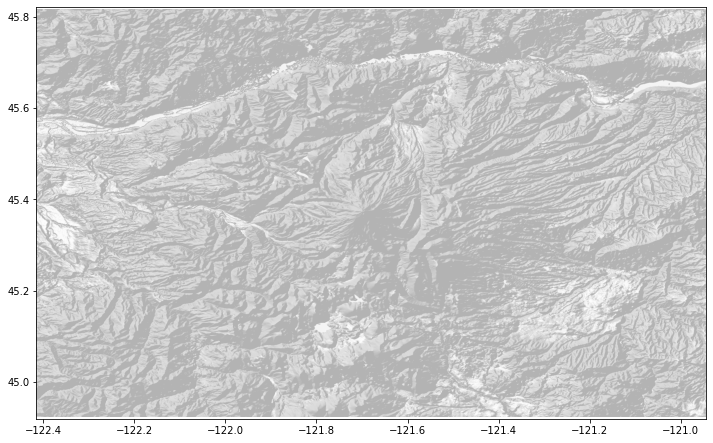

In [6]:
#show plot
fig, ax = plt.subplots(1, figsize=(12,12)) #make plot


# show(dem_array, cmap='gist_earth', ax=ax) #show DEM, color map, ax is default

ls = LightSource(azdeg=315, altdeg=60)
ax.imshow(ls.hillshade(dem_array, vert_exag=1),extent=[left, right, bottom, top],cmap='gray',alpha=0.3)


plt.axis() #show axis, put 'off' inside parenthesis to get rid of axis
plt.show() #show plot

Helens Data

In [7]:
#reading pnsn data
one = pd.read_csv(f'{homedir}pnsn_Helens_next_10000.csv')
two = pd.read_csv(f'{homedir}pnsn_Helens_latest_10000.csv')
three = pd.read_csv(f'{homedir}pnsn_Helens_final_few.csv')

pnsn = pd.concat([one,two,three])

pnsn = pnsn.drop_duplicates(ignore_index=True) #ignore overlap between csvs
#should be 20,064 events

pnsn_lat = pnsn['Lat'].values.tolist()
pnsn_lon = pnsn['Lon'].values.tolist()

In [8]:
#reading Helens stations and locations
center_lat = volc_lat_lon['St_Helens'][0]
center_lon = volc_lat_lon['St_Helens'][1]

loc_df = pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/St_Helens_Template_Locations.csv') #get locations
loc_lats = loc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
loc_lons = loc_df['Longitude'].values.tolist() #get a list of longitudes for template locations


volc_md = pd.read_csv(f'/home/smocz/expand_redpy/catalogs/Volcano_Metadata.csv') #read metadata
stas_lats = volc_md[volc_md['Volcano_Name']=='St_Helens']['Latitude'].values.tolist() #get latitude for stations at this volcano
stas_lons = volc_md[volc_md['Volcano_Name']=='St_Helens']['Longitude'].values.tolist() #get latitude for stations at this volcano

Hood Data

In [8]:
#reading Helens stations and locations
center_lat = volc_lat_lon['Hood'][0]
center_lon = volc_lat_lon['Hood'][1]

#read old locs
loc_df = pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/Hood_Template_Locations.csv') #get locations
old_lats = loc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
old_lons = loc_df['Longitude'].values.tolist() #get a list of longitudes for template locations


loc_df = pd.read_csv(f'{homedir}locations/nick_hood_SD.RELOC_CLEANED')
#pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/{csvname}.csv') #get locations
loc_lats = loc_df['mLat'].values.tolist() #get a list of latitudes for template locations
loc_lons = loc_df['mLong'].values.tolist() #get a list of longitudes for template locations


volc_md = pd.read_csv(f'/home/smocz/expand_redpy/catalogs/Volcano_Metadata.csv') #read metadata
stas_lats = volc_md[volc_md['Volcano_Name']=='Hood']['Latitude'].values.tolist() #get latitude for stations at this volcano
stas_lons = volc_md[volc_md['Volcano_Name']=='Hood']['Longitude'].values.tolist() #get latitude for stations at this volcano

cc_df = pd.read_csv(f'{homedir}locations/Hood_comcat_locs.csv')
cc_lats = cc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
cc_lons = cc_df['Longitude'].values.tolist() #get a list of longitudes for template locations


Rainier Data

In [6]:
#reading Helens stations and locations
center_lat = volc_lat_lon['Rainier'][0]
center_lon = volc_lat_lon['Rainier'][1]

#read old locs
loc_df = pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/Rainier_Template_Locations.csv') #get locations
old_lats = loc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
old_lons = loc_df['Longitude'].values.tolist() #get a list of longitudes for template locations

volc_md = pd.read_csv(f'/home/smocz/expand_redpy/catalogs/Volcano_Metadata.csv') #read metadata
stas_lats = volc_md[volc_md['Volcano_Name']=='Rainier']['Latitude'].values.tolist() #get latitude for stations at this volcano
stas_lons = volc_md[volc_md['Volcano_Name']=='Rainier']['Longitude'].values.tolist() #get latitude for stations at this volcano

Baker

In [28]:
#reading Helens stations and locations
center_lat = volc_lat_lon['Baker'][0]
center_lon = volc_lat_lon['Baker'][1]

#read old locs
loc_df = pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/Baker_Template_Locations.csv') #get locations
old_lats = loc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
old_lons = loc_df['Longitude'].values.tolist() #get a list of longitudes for template locations

volc_md = pd.read_csv(f'/home/smocz/expand_redpy/catalogs/Volcano_Metadata.csv') #read metadata
stas_lats = volc_md[volc_md['Volcano_Name']=='Baker']['Latitude'].values.tolist() #get latitude for stations at this volcano
stas_lons = volc_md[volc_md['Volcano_Name']=='Baker']['Longitude'].values.tolist() #get latitude for stations at this volcano

Newberry

In [16]:
#reading Helens stations and locations
center_lat = volc_lat_lon['Newberry'][0]
center_lon = volc_lat_lon['Newberry'][1]

#read old locs
loc_df = pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/Newberry_Template_Locations.csv') #get locations
old_lats = loc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
old_lons = loc_df['Longitude'].values.tolist() #get a list of longitudes for template locations

volc_md = pd.read_csv(f'/home/smocz/expand_redpy/catalogs/Volcano_Metadata.csv') #read metadata
stas_lats = volc_md[volc_md['Volcano_Name']=='Newberry']['Latitude'].values.tolist() #get latitude for stations at this volcano
stas_lons = volc_md[volc_md['Volcano_Name']=='Newberry']['Longitude'].values.tolist() #get latitude for stations at this volcano

Plotting

left: -122.41461222757123 | right: -120.94464070211627 | bottom: 44.91853103012515 | top: 45.82229525731502
center: -121.696509, 45.373221


(44.91853103012515, 45.82229525731502)

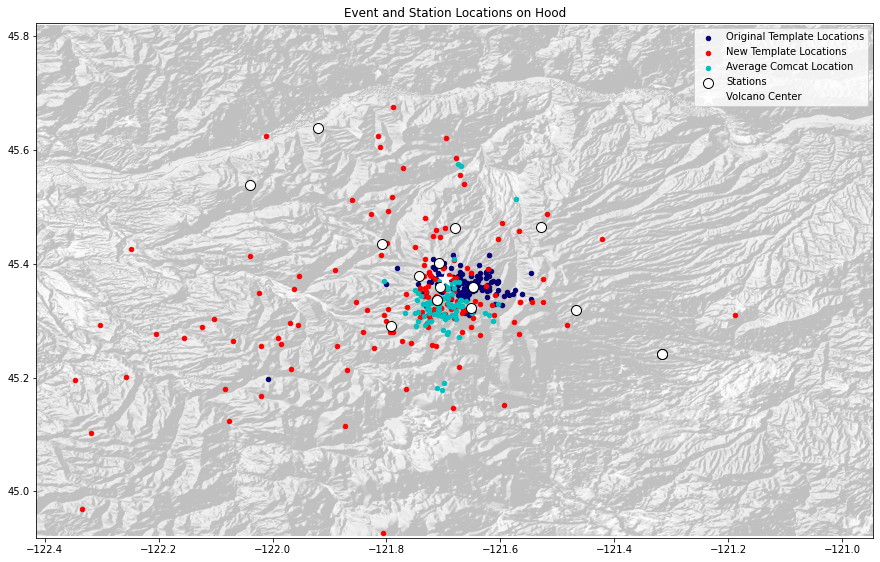

In [10]:
# lat = 46.814988 #latitude of lower left corner
# lon = -121.816528 #longitude of lower left corner
# length = 8e3 #length in m for the edges of the graph

crs = dem_data_dict['crs'] #get crs
data = dem_data_dict['data'] #get data


# left_x,bottom_y = transform(p1,p2,lon,lat) #transform lower left corner to UTM
# center_eastings, center_northings = transform(p1,p2,center_lon,center_lat) #transform center of volcano to UTM

print(f'left: {left} | right: {right} | bottom: {bottom} | top: {top}')
print(f'center: {center_lon}, {center_lat}')

fig, ax = plt.subplots(1, figsize=(15,15)) #make plot

ls = LightSource(azdeg=315, altdeg=45)
ax.imshow(ls.hillshade(dem_array, vert_exag=1),extent=[left, right, bottom, top],cmap='gray',alpha=0.25)
# ax.imshow(data,extent=[left, right, bottom, top],cmap='gist_earth')
ax.set_title(f'Event and Station Locations on {volc}')
# ax.scatter(pnsn_lon, pnsn_lat,marker='.',color='purple',label='PNSN Locations') #,alpha=0.5
ax.scatter(old_lons, old_lats,marker='.',color='#070173',s=80,label='Original Template Locations') #,alpha=0.5
ax.scatter(loc_lons, loc_lats,marker='.',color='red',s=80,label='New Template Locations') #,alpha=0.5
ax.scatter(cc_lons, cc_lats,marker='.',color='c',s=80,label='Average Comcat Location') #,alpha=0.5
ax.scatter(stas_lons, stas_lats,marker='o',color='white',edgecolors='black',s=100,label='Stations')
ax.scatter(center_lon, center_lat,marker='*',color='white',edgecolors='white',s=200,label='Volcano Center')
ax.legend()

#crop/zoom-in on map
ax.set_xlim(left,right) #can add/subtract from values to zoom in/out
ax.set_ylim(bottom,top)

# ax.set_xlim(-122,-121.7)
# ax.set_ylim(46.7,47)


### ISSUE: IT SQUISHES WITH THE DIMENSIONS
# fig.savefig('Hood_locations.png',dpi=600)